In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
from tqdm import trange
import scipy
import scipy.stats as stats
from scipy.stats import bernoulli

In [2]:
def is_consensus(x, fix):
    res = True
    count = 0
    for i in range(1, len(x)):
        if x[i-1] != x[i]:
            count += 1
    if count > 2:
        res = False
    return res
def clusters(x0,eps2, fix = {}):
    count = [x0[0]]
    l=0
    for i in range(1,len(x0)):
        if i not in fix:
            for j in range (len(count)):
                if np.abs(x0[i] - count[j])<eps2:
                    l+=1
            if l==0:
                count.append(x0[i])
            l=0
    return np.array(count)

def cl_capacity(x0,cls,eps2, fix = {}):
    capacity = []
    l=0
    for i in range(len(cls)):
            for j in range (len(x0)):
                if j not in fix:
                    if np.abs(x0[j] - cls[i])<eps2:
                        l+=1
            capacity.append(l)
            l=0
    if sum(capacity)>len(x0):
        raise Error
    return np.array(capacity)

In [3]:
def compare (x ,y, eps):
    result = 1
    for k in range(len(x)):
        if abs(x[k] - y[k]) >= eps:
            result = 0
    return bool(result)

def insert_agent(x, ind):
    if  ind != 0:
        opinion = (x[ind]+x[ind-1])/2
    else:
        opinion = x[ind]
    _X = np.insert(x,ind,opinion)
    return _X

def new_op(x, i, eps):
    count = 1
    summ = x[i]
    for k in range(len(x)):
        if (abs(x[i] - x[k]) < eps) and (i != k):
            #print(i, j, x[i], x[j])
            summ += x[k]
            count += 1
    #print(summ, count)
    return summ/count

def pair_count (x0, fix = {}):
    count = [0, 0]
    for i in range(len(x0)):
        if i not in fix:
            if x0[i] >= 0.5:
                count[0] += 1
            else:
                count[1] += 1
    #count[0] = count[0]/len(x0)
    #count[1] = count[1] / len(x0)
    return count

def Hen_Kr (x0, eps, eps2,fix, v):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        t += 1
        for j in range(len(x0)):
            if j not in fix:
                X[t][j] = new_op(X[t - 1], j, eps)
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

def find_fix(x0):
    diff = 1
    ind = 0
    for j in range (len(x0)):
        if (x0[j] - 0.5 < diff) and (x0[j] - 0.5 >= 0):
            ind = j
            diff = abs(0.5 - x0[j])
    return ind

In [4]:
def Hen_Kr_actm2_statistics (x0, eps, eps2,fix, v, prob):
    X = [np.array(x0)]
    t = 0
    consensus_value = 0
    consensus_time = 0
    consensus_flag = True
    pos0_6_time = 0
    pos0_6_flag = True
    while True:
        X.append(np.zeros(len(x0)))
        active_mask = bernoulli.rvs(p=prob, size=n)
        t += 1
        for j in range(len(x0)):
            if j not in fix and active_mask[j]==1:
                X_prev = np.copy(X[t -1])
                X_prev[active_mask==0]=0-2*eps - 2*eps2 
                X[t][j] = new_op(X_prev, j, eps)
                X[t][active_mask==0]=X[t-1][active_mask==0]
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if consensus_flag:
            ctrs = clusters(X[t],eps,fix_control)
            if len(ctrs) ==1:
                consensus_flag = False
                consensus_time = t
                consensus_value = X[t][0]
        if pos0_6_flag and np.all(X[t]>= 0.6):
            pos0_6_time = t
            pos0_6_flag = False
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t, consensus_value, consensus_time, pos0_6_time

In [7]:
eps = 0.2
eps2 = 0.0001
n =170
p = 1
prob = 1

In [6]:
np.linspace(0,1,n)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

0.2 (170,) [0.00531412 0.01250153 0.01328118 0.01541748 0.01679875 0.01788644
 0.01869779 0.02352328 0.0327732  0.04488929 0.05211149 0.05387013
 0.05485316 0.05878079 0.06286001 0.07359359 0.07625444 0.09362495
 0.09680608 0.10422957 0.10765484 0.10974844 0.15966703 0.16531177
 0.16909804 0.18529695 0.19223531 0.19339828 0.20998981 0.21226537
 0.22249847 0.22882886 0.24178523 0.2496527  0.25055966 0.25512563
 0.26050398 0.27692044 0.27698279 0.28324497 0.29352297 0.29569466
 0.31061811 0.31702589 0.31771033 0.32041079 0.32916633 0.33212077
 0.33915194 0.34137063 0.34778468 0.35183084 0.3556757  0.35602315
 0.3608895  0.36736791 0.37460011 0.38124826 0.38517582 0.38609178
 0.38997196 0.39233921 0.39669762 0.40420388 0.40526984 0.40552998
 0.41702875 0.41800058 0.42063587 0.4248655  0.44441384 0.44602482
 0.44610997 0.45517126 0.46501196 0.47323137 0.48039261 0.48203178
 0.49270579 0.49666792 0.49796362 0.50451012 0.5058243  0.51415862
 0.52264764 0.52539757 0.52875544 0.5437779  0.5465

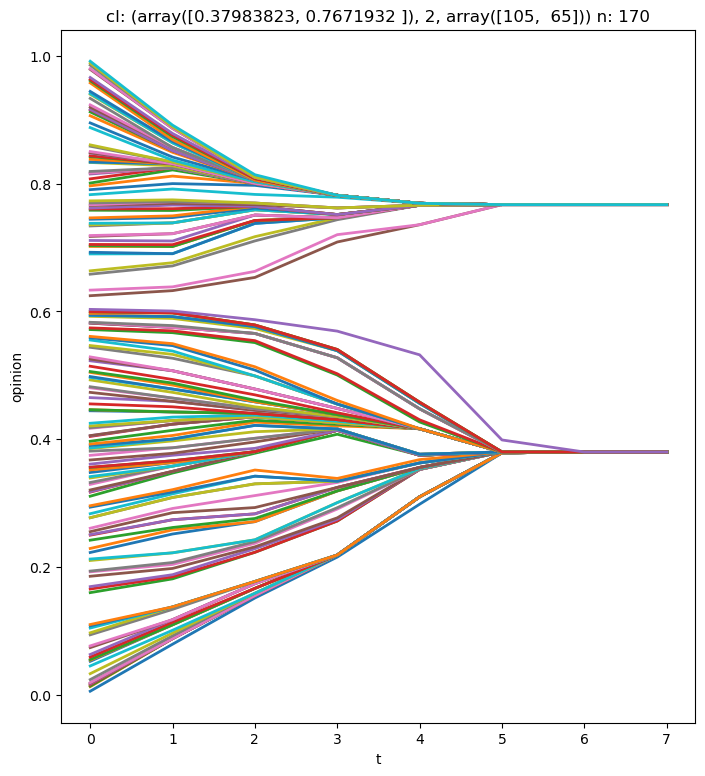

In [10]:
cluster_numbers = np.zeros(n)

#cl_rs = np.zeros(n, dtype=object)
cl_rs = np.zeros(n, dtype=list)
capacity = np.zeros(n, dtype=list)

count_experiments = 1000



fix_control = set({})
v_c = 0

x0 = np.random.sample(n)
x0.sort()
#eps = x0[1]-x0[0]

print(eps, x0.shape, x0)

X, t = Hen_Kr(x0, eps, eps2, fix_control,v_c)
cltrs = clusters(X[t],eps/3,fix_control)
cl_cap = cl_capacity(X[t],cltrs,eps/3,fix_control)

t_list = np.linspace(0, t, t + 1)
fig = plt.figure(facecolor='white', figsize=(18, 9))

ax1 = fig.add_subplot(121)
ax1.plot(t_list, X, linewidth=2)

ax1.set_xlabel('t')
ax1.set_ylabel('opinion')
ax1.title.set_text(f'cl: {cltrs, len(cltrs), cl_cap} n: {n}')
print(sum(cltrs))

plt.show()

In [17]:

cluster_numbers = np.zeros(n)

#cl_rs = np.zeros(n, dtype=object)
cl_rs = np.zeros(n, dtype=list)
capacity = np.zeros(n, dtype=list)

count_experiments = 1000


prob=0.5

fix_control = set({})
v_c = 0

case2_rel = np.asarray([], dtype=object)
case2_norm = np.asarray([], dtype=object)

case3_rel = np.asarray([], dtype=object)
case3_norm = np.asarray([], dtype=object)

case4_norm = np.asarray([], dtype=object)
case4_rel= np.asarray([], dtype=object)

In [12]:
x0 = np.linspace(0, 1, num=n)
x0

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

1.0000000000000007


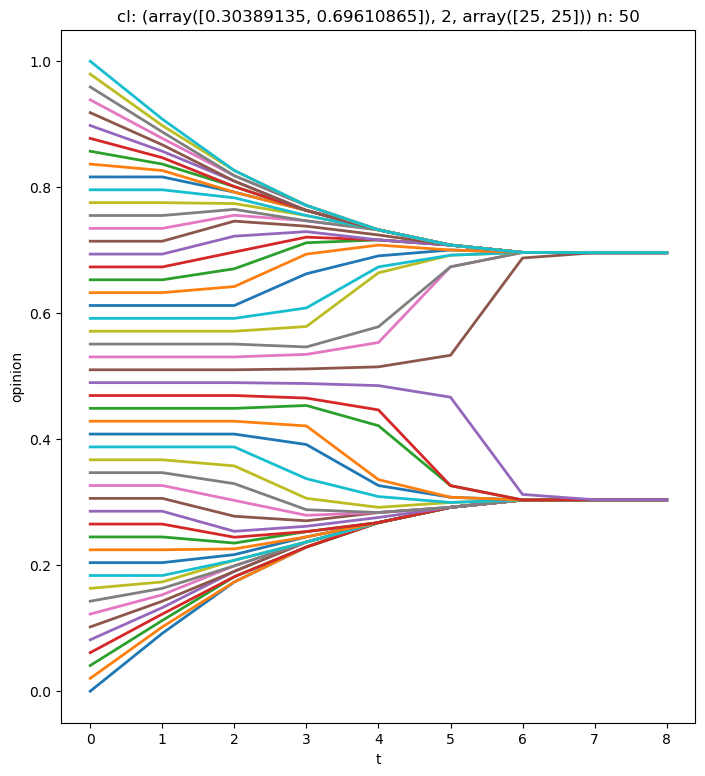

In [13]:
X, t = Hen_Kr(x0, eps, eps2, fix_control,v_c)
cltrs = clusters(X[t],eps/3,fix_control)
cl_cap = cl_capacity(X[t],cltrs,eps/3,fix_control)

t_list = np.linspace(0, t, t + 1)
fig = plt.figure(facecolor='white', figsize=(18, 9))

ax1 = fig.add_subplot(121)
ax1.plot(t_list, X, linewidth=2)

ax1.set_xlabel('t')
ax1.set_ylabel('opinion')
ax1.title.set_text(f'cl: {cltrs, len(cltrs), cl_cap} n: {n}')
print(sum(cltrs))

plt.show()

In [18]:
for i in trange(count_experiments):
    
    #x0 = np.random.sample(n)
    #x0.sort()
    x0 = np.linspace(0, 1, num=n)
        
    X, t, cons_value, cons_time, positive_time = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
    cltrs = clusters(X[t],eps/3,fix_control)
    cl_cap = cl_capacity(X[t],cltrs,eps/3,fix_control)
    
    cluster_numbers[len(cltrs)-1] +=1
    
    cl_rs[len(cltrs)-1] = np.append(cl_rs[len(cltrs)-1], cltrs)
    capacity[len(cltrs)-1] = np.append(capacity[len(cltrs)-1], [cl_cap])
    
    
    if len(cltrs)==2:
        Xt = np.array([X,t], dtype=object)
        if any(cl_cap==1):
            case2_rel = np.append(case2_rel, Xt)
        else:
            case2_norm = np.append(case2_norm, Xt)
        if len(cltrs)==3:
            if any(cl_cap==1):
                case3_rel = np.append(case3_rel, Xt)
            else:
                case3_norm = np.append(case3_norm, Xt)
        if len(cltrs)==4:
            if any(cl_cap==1):
                case4_rel = np.append(case4_rel, Xt)
            else:
                case4_norm = np.append(case4_norm, Xt)

        '''t_list = np.linspace(0, t, t + 1)
        fig = plt.figure(facecolor='white', figsize=(18, 9))

        ax1 = fig.add_subplot(121)
        ax1.plot(t_list, X, linewidth=2)

        ax1.set_xlabel('t')
        ax1.set_ylabel('opinion')

        ax1.title.set_text(f'p: {prob}, cl: {cltrs, len(cltrs), cl_cap} n: {n}')
        plt.show()'''



print(cluster_numbers[:4])
#print(cl_rs)


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 41.77it/s]

[ 18. 828. 150.   4.]


In [19]:
print(cluster_numbers[:4], np.sum(cluster_numbers))

[ 18. 828. 150.   4.] 1000.0


In [20]:
case2_rel.shape[0]/2, case2_norm.shape[0]/2

(1.0, 827.0)

In [49]:
case3_rel.shape[0]/2, case3_norm.shape[0]/2

(499.0, 46.0)

In [50]:
case4_rel.shape[0]/2, case4_norm.shape[0]/2

(26.0, 0.0)

In [ ]:
for i in range(1,case2_norm.shape[0],2):
    X_c = case2_norm[i-1]
    t_c = case2_norm[i]

    cltrs = clusters(X_c[t_c],eps/3,fix_control)
    cl_cap = cl_capacity(X_c[t_c],cltrs,eps/3,fix_control)

    t_list = np.linspace(0, t_c, t_c + 1)
    fig = plt.figure(facecolor='white', figsize=(18, 9))

    ax1 = fig.add_subplot(121)
    ax1.plot(t_list, X_c, linewidth=2)

    ax1.set_xlabel('t')
    ax1.set_ylabel('opinion')

    ax1.title.set_text(f'p: {prob}, cl: {cltrs}, {len(cltrs)}, {cl_cap} n: {n}, i: {i}')
    plt.show()

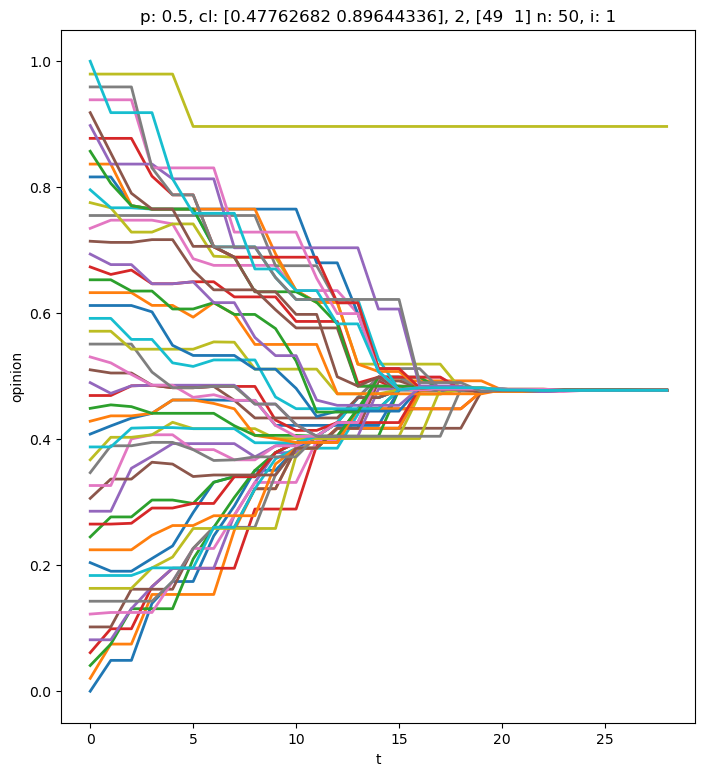

In [23]:
for i in range(1,case2_rel.shape[0],2):
    X_c = case2_rel[i-1]
    t_c = case2_rel[i]

    cltrs = clusters(X_c[t_c],eps/3,fix_control)
    cl_cap = cl_capacity(X_c[t_c],cltrs,eps/3,fix_control)

    t_list = np.linspace(0, t_c, t_c + 1)
    fig = plt.figure(facecolor='white', figsize=(18, 9))

    ax1 = fig.add_subplot(121)
    ax1.plot(t_list, X_c, linewidth=2)

    ax1.set_xlabel('t')
    ax1.set_ylabel('opinion')

    ax1.title.set_text(f'p: {prob}, cl: {cltrs}, {len(cltrs)}, {cl_cap} n: {n}, i: {i}')
    plt.show()

In [62]:
np.save('case4_rel.npy', case4_rel)
np.save('case4_norm.npy', case4_norm)
np.save('case3_rel.npy', case3_rel)
np.save('case3_norm.npy', case3_norm)